## Preparación de los datos

Se llaman las librerías necesarias su efecto:

In [439]:
import xml.etree.cElementTree as ET
import os
import random
import pandas as pd
import re
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



Se extraen los datos de los archivos con diagnostico negativo de depresión. De los datos en el corpus se extraen el titulo y el texto.

In [310]:
dirsNegative = ['SourceFiles/erisk 2017 - test split/negative_examples_anonymous/',
               'SourceFiles/erisk 2017 - training split/negative_examples_anonymous/',
               'SourceFiles/erisk 2018 - test split/neg/']
corpusNegative  = []
for direc in dirsNegative:
    directory = os.fsencode(direc)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        tree = ET.parse(direc+filename)
        root = tree.getroot()
        i = 0
        for elem in root:
            if i > 0:
                if elem.find("TITLE").text.isspace():
                    s_title = "" 
                else:
                    s_title = re.sub('\n', '', elem.find("TITLE").text)
                s_date = elem.find("DATE").text 
                s_info = elem.find("INFO").text 
                if elem.find("TEXT").text.isspace():
                    s_text = "" 
                else:
                    s_text = re.sub('\n', ' ', elem.find("TEXT").text)
                    
                s_diagnose = "false"
                corpusNegative.append({"title": s_title, "date": s_date, "info": s_info, "text": s_text, "diagnose": s_diagnose})
            i = i + 1
    

Se extraen los datos de los archivos con diagnostico positivo de depresión.

In [311]:
dirsPositive = ['SourceFiles/erisk 2017 - test split/positive_examples_anonymous/',
                'SourceFiles/erisk 2017 - training split/positive_examples_anonymous/',
               'SourceFiles/erisk 2018 - test split/pos/']
corpusPositive  = []
for direc in dirsPositive:
    directory = os.fsencode(direc)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        tree = ET.parse(direc+filename)
        root = tree.getroot()
        i = 0
        for elem in root:
            if i > 0:
                if elem.find("TITLE").text.isspace():
                    s_title = "" 
                else:
                    s_title = re.sub('\n', '', elem.find("TITLE").text)
                s_date = elem.find("DATE").text 
                s_info = elem.find("INFO").text 
                if elem.find("TEXT").text.isspace():
                    s_text = "" 
                else:
                    s_text = re.sub('\n', ' ', elem.find("TEXT").text)
                s_diagnose = "true"
                corpusPositive.append({"title": s_title, "date": s_date, "info": s_info, "text": s_text, "diagnose": s_diagnose})
            i = i + 1
    

Esta es la longitud de cada corpus, de los textos con casos positivos y negativos.

In [312]:
len(corpusPositive)

90222

In [313]:
len(corpusNegative)

986360

Se extraen sólo una parte de los textos con diagnosticos negativos. (con el mismo tamaño del corpus de los casos positivos)

In [314]:
corpusNegativeSample = random.sample(corpusNegative, 90222)

In [315]:
corpusNegativeSample

[{'title': '',
  'date': ' 2015-05-03 17:25:38 ',
  'info': ' reddit post ',
  'text': ' So for all those people who want to totally delete their Facebook accounts but are having trouble doing so . . . . /s ',
  'diagnose': 'false'},
 {'title': '',
  'date': ' 2015-01-28 14:53:40 ',
  'info': ' reddit post ',
  'text': ' TIL = Today I learned  :D ',
  'diagnose': 'false'},
 {'title': ' Chris Sale Has Emerged As A Leader For Red Sox, Both On And Off Field | Red Sox First Pitch ',
  'date': ' 2017-05-07 20:27:05 ',
  'info': ' reddit post ',
  'text': '',
  'diagnose': 'false'},
 {'title': " Four-year-old girl battling leukemia 'marries' her favorite nurse ",
  'date': ' 2015-07-18 02:11:57 ',
  'info': ' reddit post ',
  'text': '',
  'diagnose': 'false'},
 {'title': ' Intervention ',
  'date': ' 2015-03-02 23:27:36 ',
  'info': ' reddit post ',
  'text': '',
  'diagnose': 'false'},
 {'title': '',
  'date': ' 2015-03-10 23:42:12 ',
  'info': ' reddit post ',
  'text': ' Thanks! ',
  'di

Se toman en cuenta el corpus completo de los casos con diagnostico positivo de depresión.

In [316]:
corpusPositive

[{'title': '',
  'date': ' 2015-05-04 07:25:36 ',
  'info': ' reddit post ',
  'text': ' I go after what I want. Why should I wait for someone else to make the first move if I have my own expectations!  ',
  'diagnose': 'true'},
 {'title': ' Air travel on thanksgiving... ',
  'date': ' 2014-11-27 18:45:56 ',
  'info': ' reddit post ',
  'text': '',
  'diagnose': 'true'},
 {'title': '',
  'date': ' 2014-10-29 03:17:24 ',
  'info': ' reddit post ',
  'text': ' Go Cyclones!!!  ',
  'diagnose': 'true'},
 {'title': '',
  'date': ' 2014-10-26 19:39:11 ',
  'info': ' reddit post ',
  'text': ' My parents grew up here (New Holland). It\'s like my second home. What a beautiful part of the country! Can\'t leave without getting Achenbachs. (and smelling the "fresh" air)  ',
  'diagnose': 'true'},
 {'title': '',
  'date': ' 2014-10-12 04:44:01 ',
  'info': ' reddit post ',
  'text': ' Fifty Shades of Ebola ',
  'diagnose': 'true'},
 {'title': '',
  'date': ' 2014-09-17 01:14:05 ',
  'info': ' redd

Se convierten las listas dataframes de Pandas:

In [317]:
dfPositive = pd.DataFrame(corpusPositive) 

In [409]:
dfNegative = pd.DataFrame(corpusNegativeSample) 

Se extraen los datos del conteo de palabras y carácteres del título y del texto por separado.

In [410]:
def word_count(sentence):
    if sentence=='':
        return 0
    else:
        return len(str(sentence).split(" "))


dfPositive['word_count_title'] = dfPositive['title'].apply(lambda x: word_count(x))
dfNegative['word_count_title'] = dfNegative['title'].apply(lambda x: word_count(x))

In [411]:
dfPositive['word_count_text'] = dfPositive['text'].apply(lambda x: word_count(x))
dfNegative['word_count_text'] = dfNegative['text'].apply(lambda x: word_count(x))

In [412]:
dfPositive['char_count_title'] = dfPositive['title'].str.len() 
dfNegative['char_count_title'] = dfNegative['title'].str.len() 

In [413]:
dfPositive['char_count_text'] = dfPositive['text'].str.len() 
dfNegative['char_count_text'] = dfNegative['text'].str.len() 

Se extraen los datos del promedio de tamaño de las palabras tanto como en el título u en el texto.

In [414]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    else:
      return (sum(len(word) for word in words)/len(words))

dfPositive['avg_word_title'] = dfPositive['title'].apply(lambda x: avg_word(x))
dfNegative['avg_word_title'] = dfNegative['title'].apply(lambda x: avg_word(x))

dfPositive['avg_word_text'] = dfPositive['text'].apply(lambda x: avg_word(x))
dfNegative['avg_word_text'] = dfNegative['text'].apply(lambda x: avg_word(x))


Se extraen los datos del promedio de tamaño de las palabras tanto como en el título u en el texto.

In [415]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

def stop_words(sentence):
    words = sentence.split()
    if len(words) == 0:
        return -1
    else:
      return len([sentence for sentence in sentence.split() if sentence in stop])


dfPositive['stopwords_title'] = dfPositive['title'].apply(lambda x: stop_words(x))
dfNegative['stopwords_title'] = dfNegative['title'].apply(lambda x: stop_words(x))

dfPositive['stopwords_text'] = dfPositive['text'].apply(lambda x: stop_words(x))
dfNegative['stopwords_text'] = dfNegative['text'].apply(lambda x: stop_words(x))

Se crea un atributo que determina si tiene sólo título, sólo texto, ambos o ninguno.

In [464]:
def title_or_text(title,text):
    if title=='' and text=='':
        return "NONE"
    elif title=='' and text!='':
        return "TEXT"
    elif title!='' and text=='':
        return "TITLE"
    else:
        return "BOTH"

dfPositive['title_or_text'] = dfPositive.apply(lambda x: title_or_text(x.title, x.text), axis=1)
dfNegative['title_or_text'] = dfNegative.apply(lambda x: title_or_text(x.title, x.text), axis=1)

Aquí se pueden ver los dataframes de los datos positivos y negativos.

In [465]:
dfPositive

,title,date,info,text,diagnose,word_count_title,word_count_text,char_count_title,char_count_text,avg_word_title,avg_word_text,stopwords_title,stopwords_text,title_or_text
0,,2015-05-04 07:25:36,reddit post,I go after what I want. Why should I wait for...,true,0,27,0,115,0.0,3.708333,-1,10,TEXT
1,Air travel on thanksgiving...,2014-11-27 18:45:56,reddit post,,true,6,0,31,0,6.5,0.000000,1,-1,TITLE
2,,2014-10-29 03:17:24,reddit post,Go Cyclones!!!,true,0,5,0,17,0.0,6.500000,-1,0,TEXT
3,,2014-10-26 19:39:11,reddit post,My parents grew up here (New Holland). It's l...,true,0,32,0,176,0.0,5.000000,-1,7,TEXT
4,,2014-10-12 04:44:01,reddit post,Fifty Shades of Ebola,true,0,6,0,23,0.0,4.500000,-1,1,TEXT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90217,,2015-06-11 00:59:27,reddit post,Small claims court?,true,0,5,0,21,0.0,5.666667,-1,0,TEXT
90218,,2015-06-10 23:38:58,reddit post,"His physique is so good, his muscles can meta...",true,0,30,0,144,0.0,4.259259,-1,10,TEXT
90219,,2015-06-10 20:14:38,reddit post,jetpack made of muscle http://drmcninja.com...,true,0,9,0,68,0.0,12.000000,-1,1,TEXT
90220,,2015-05-29 15:06:29,reddit post,"For one, she said it would invalidate his pr...",true,0,33,0,176,0.0,4.965517,-1,11,TEXT


In [466]:
dfNegative

,title,date,info,text,diagnose,word_count_title,word_count_text,char_count_title,char_count_text,avg_word_title,avg_word_text,stopwords_title,stopwords_text,title_or_text
0,,2015-05-03 17:25:38,reddit post,So for all those people who want to totally d...,false,0,26,0,119,0.000000,3.916667,-1,11,TEXT
1,,2015-01-28 14:53:40,reddit post,TIL = Today I learned :D,false,0,9,0,27,0.000000,3.166667,-1,0,TEXT
2,Chris Sale Has Emerged As A Leader For Red So...,2017-05-07 20:27:05,reddit post,,false,22,0,93,0,3.600000,0.000000,0,-1,TITLE
3,Four-year-old girl battling leukemia 'marries...,2015-07-18 02:11:57,reddit post,,false,10,0,67,0,7.250000,0.000000,1,-1,TITLE
4,Intervention,2015-03-02 23:27:36,reddit post,,false,3,0,14,0,12.000000,0.000000,0,-1,TITLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90217,"What's your favorite sub with fewer than 10,0...",2017-02-18 16:59:49,reddit post,,false,11,0,62,0,5.777778,0.000000,3,-1,TITLE
90218,,2015-05-26 02:41:12,reddit post,Is it smarter?,false,0,5,0,16,0.000000,4.000000,-1,1,TEXT
90219,"Cop (former ""Hot-ess Hostess"") sentenced to t...",2015-06-17 14:53:27,reddit post,,false,16,0,87,0,5.142857,0.000000,3,-1,TITLE
90220,,2017-03-18 13:38:52,reddit post,Now kiss no homo,false,0,6,0,18,0.000000,3.250000,-1,1,TEXT


## Análisis descriptivo de los datos

### Histogramas con casos negativos

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

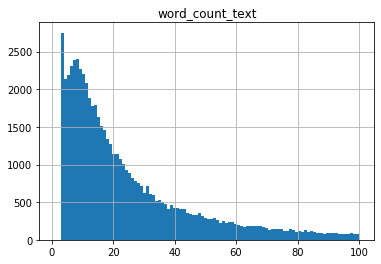

In [419]:
hist = dfNegative.hist(column='word_count_text', bins=100, range=(1,100)) 

#### Conteo de las palabras en el título (de 1 a 100, sin contar los datos que están vacíos).

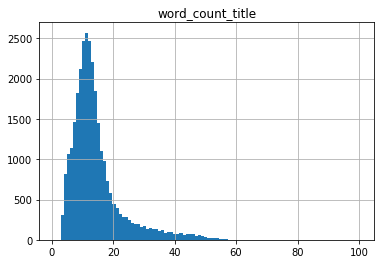

In [420]:
hist = dfNegative.hist(column='word_count_title', bins=100, range=(1,100)) 

#### Conteo de caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

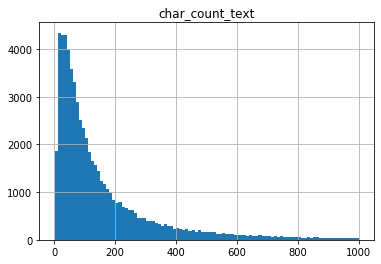

In [421]:
hist = dfNegative.hist(column='char_count_text', bins=100, range=(1,1000)) 

#### Conteo de caracteres en el título (de 1 a 100, sin contar los datos que están vacíos).

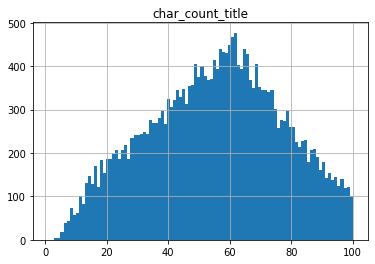

In [422]:
hist = dfNegative.hist(column='char_count_title', bins=100, range=(1,100)) 

#### Promedio de caracteres por palabra en el título (mayores que 0)

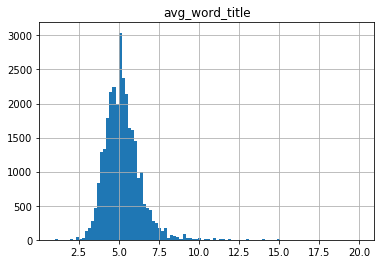

In [423]:
hist = dfNegative.hist(column='avg_word_title', bins=100, range=(1,20)) 

#### Promedio de caracteres por palabra en el texto (mayores que 0)

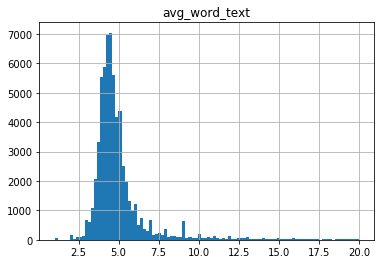

In [424]:
hist = dfNegative.hist(column='avg_word_text', bins=100, range=(1,20)) 

#### Número de stopwords en el texto (cuando el texto no es vacío)

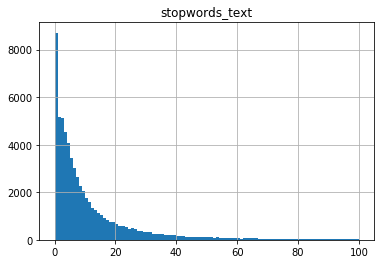

In [425]:
hist = dfNegative.hist(column='stopwords_text', bins=100, range=(0,100)) 

#### Número de stopwords en el título  (cuando el texto no es vacío)

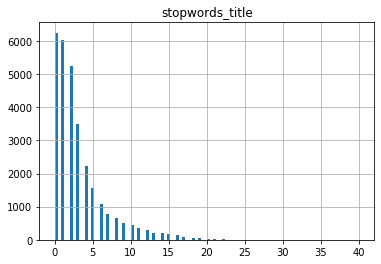

In [426]:
hist = dfNegative.hist(column='stopwords_title', bins=100, range=(0,40)) 

#### Conteo de sentencias que tienen solo texto u título, ambas o ninguna.

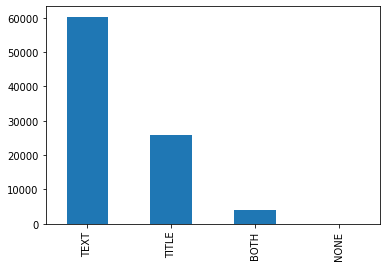

In [468]:
dfNegative['title_or_text'].value_counts().plot(kind='bar')

### Histograma con casos positivos

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

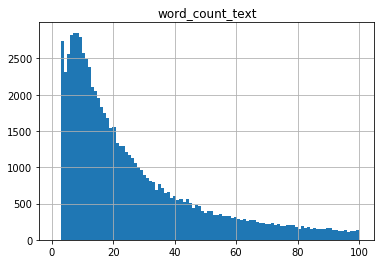

In [428]:
hist = dfPositive.hist(column='word_count_text', bins=100, range=(1,100)) 

#### Conteo de las palabras en el título (de 1 a 100, sin contar los datos que están vacíos).

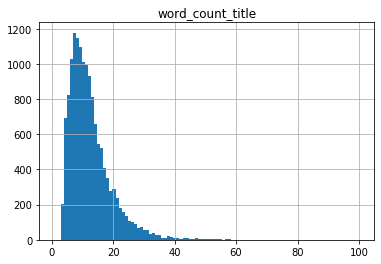

In [429]:
hist = dfPositive.hist(column='word_count_title', bins=100, range=(1,100)) 

#### Conteo de caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

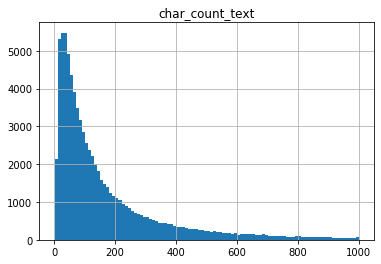

In [430]:
hist = dfPositive.hist(column='char_count_text', bins=100, range=(1,1000)) 

#### Conteo de caracteres en el título (de 1 a 100, sin contar los datos que están vacíos).

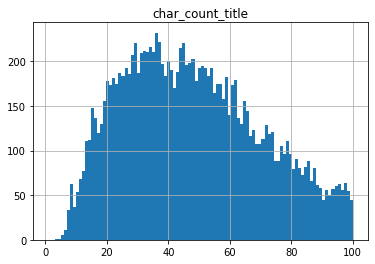

In [431]:
hist = dfPositive.hist(column='char_count_title', bins=100, range=(1,100)) 

#### Promedio de caracteres por palabra en el título (mayores que 0)

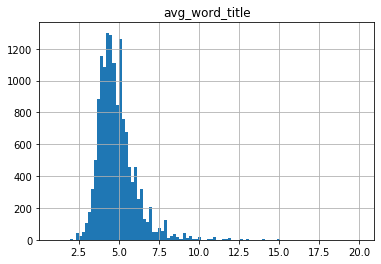

In [432]:
hist = dfPositive.hist(column='avg_word_title', bins=100, range=(1,20))

#### Promedio de caracteres por palabra en el texto (mayores que 0)

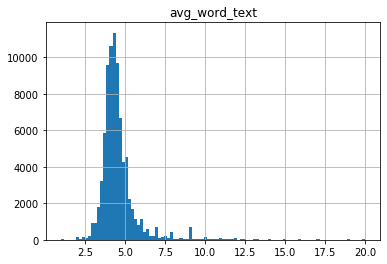

In [433]:
hist = dfPositive.hist(column='avg_word_text', bins=100, range=(1,20)) 

#### Número de stopwords en el texto (cuando el texto no es vacío)

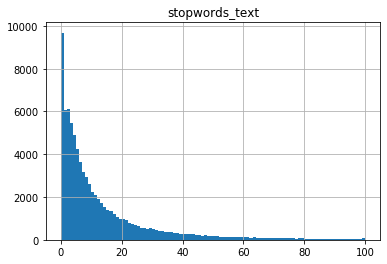

In [434]:
hist = dfPositive.hist(column='stopwords_text', bins=100, range=(0,100)) 

#### Número de stopwords en el título  (cuando el texto no es vacío)

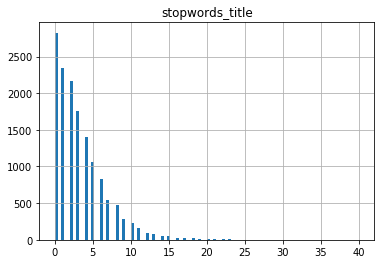

In [435]:
hist = dfPositive.hist(column='stopwords_title', bins=100, range=(0,40))

#### Conteo de sentencias que tienen solo texto u título, ambas o ninguna.

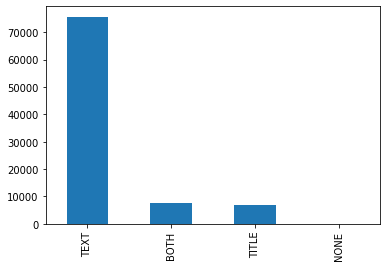

In [467]:
dfPositive['title_or_text'].value_counts().plot(kind='bar')

### Histogramas con datos conjuntos

Los datos del dataset con datos con diagnóstico negativo están en rojo y los datos con el diagnóstico positivo están en verde.

#### Conteo de las palabras en el texto (de 1 a 100, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico positivo de depresión tienden a tener texto con más palabras.

<BarContainer object of 20 artists>

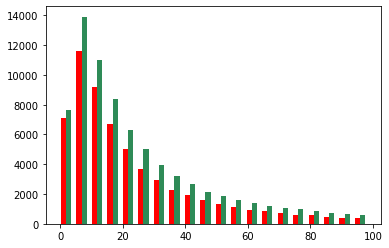

In [437]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['word_count_text'], bins=20, range=(1,100))
b_heights, b_bins = np.histogram(dfPositive['word_count_text'], bins=20, range=(1,100))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Conteo de las palabras en el título (de 1 a 100, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener títulos con más palabras.

<BarContainer object of 20 artists>

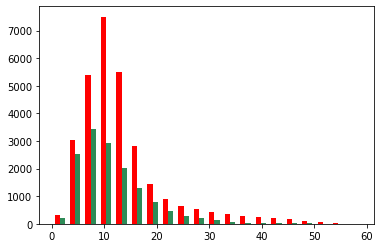

In [438]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['word_count_title'], bins=20, range=(1,60))
b_heights, b_bins = np.histogram(dfPositive['word_count_title'], bins=20, range=(1,60))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Conteo de las caracteres en el texto (de 1 a 100, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico positivo de depresión tienden a tener texto con más caracteres.

<BarContainer object of 20 artists>

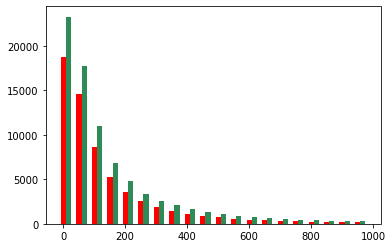

In [442]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['char_count_text'], bins=20, range=(1,1000))
b_heights, b_bins = np.histogram(dfPositive['char_count_text'], bins=20, range=(1,1000))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Conteo de las caracteres en el título (de 1 a 100, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener títulos con más caracteres.

<BarContainer object of 20 artists>

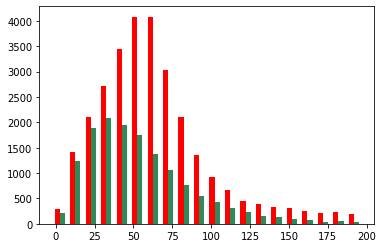

In [476]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['char_count_title'], bins=20, range=(1,200))
b_heights, b_bins = np.histogram(dfPositive['char_count_title'], bins=20, range=(1,200))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Promedio de caracteres por palabras en el texto (de 1 a 10, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico positivo de depresión tienden a tener texto con más caracteres.

<BarContainer object of 20 artists>

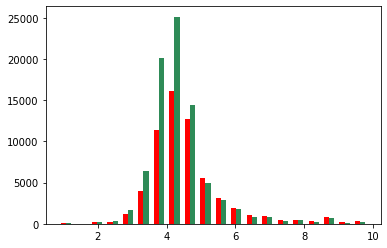

In [448]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['avg_word_text'], bins=20, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['avg_word_text'], bins=20, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Promedio de caracteres por palabras en el título (de 1 a 10, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener palabras más largas en el título.

<BarContainer object of 20 artists>

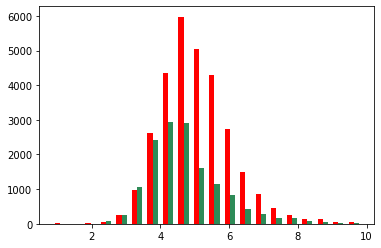

In [479]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['avg_word_title'], bins=20, range=(1,10))
b_heights, b_bins = np.histogram(dfPositive['avg_word_title'], bins=20, range=(1,10))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Número de stopwords en el título (de 1 a 20, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener palabras más largas en el texto.

<BarContainer object of 20 artists>

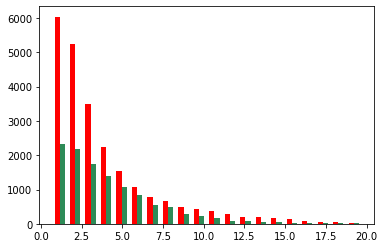

In [451]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['stopwords_title'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['stopwords_title'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Número de stopwords en el texto (de 1 a 20, sin contar los datos que están vacíos).

In [ ]:
Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener más stopwords en el texto.

<BarContainer object of 20 artists>

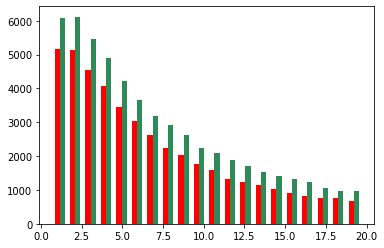

In [452]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['stopwords_text'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['stopwords_text'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Número de stopwords en el título (de 1 a 20, sin contar los datos que están vacíos).

Se puede ver que los datos de pacientes con diagnóstico negativo de depresión tienden a tener más stopwords en el título.

<BarContainer object of 20 artists>

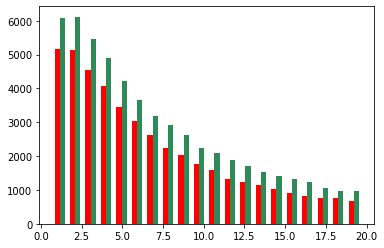

In [481]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(dfNegative['stopwords_text'], bins=20, range=(1,20))
b_heights, b_bins = np.histogram(dfPositive['stopwords_text'], bins=20, range=(1,20))

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='red')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

#### Conteo de sentencias que tienen solo texto u título, ambas o ninguna.

Se puede ver que para los diagnósticos positivos hay más ocurrencias con solo título que en los diagnósticos negativos.

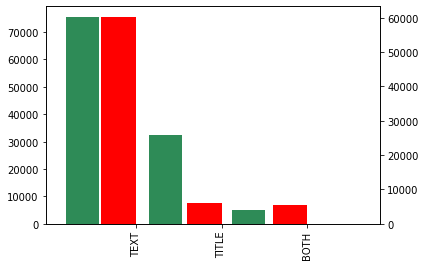

In [471]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 

width = 0.4

dfPositive['title_or_text'].value_counts().plot(kind='bar', color='red', ax=ax, width=width, position=1)
dfNegative['title_or_text'].value_counts().plot(kind='bar', color='seagreen', ax=ax2, width=width, position=2)

plt.show()